[<a class="tag" href="/tag/change/page/1/">change</a>, <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>, <a class="tag" href="/tag/thinking/page/1/">thinking</a>, <a class="tag" href="/tag/world/page/1/">world</a>, <a class="tag" href="/tag/abilities/page/1/">abilities</a>, <a class="tag" href="/tag/choices/page/1/">choices</a>, <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>, <a class="tag" href="/tag/life/page/1/">life</a>, <a class="tag" href="/tag/live/page/1/">live</a>, <a class="tag" href="/tag/miracle/page/1/">miracle</a>, <a class="tag" href="/tag/miracles/page/1/">miracles</a>, <a class="tag" href="/tag/aliteracy/page/1/">aliteracy</a>, <a class="tag" href="/tag/books/page/1/">books</a>, <a class="tag" href="/tag/classic/page/1/">classic</a>, <a class="tag" href="/tag/humor/page/1/">humor</a>, <a class="tag" href="/tag/be-yourself/page/1/">be-yourself</a>, <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>, <a class="tag" hr

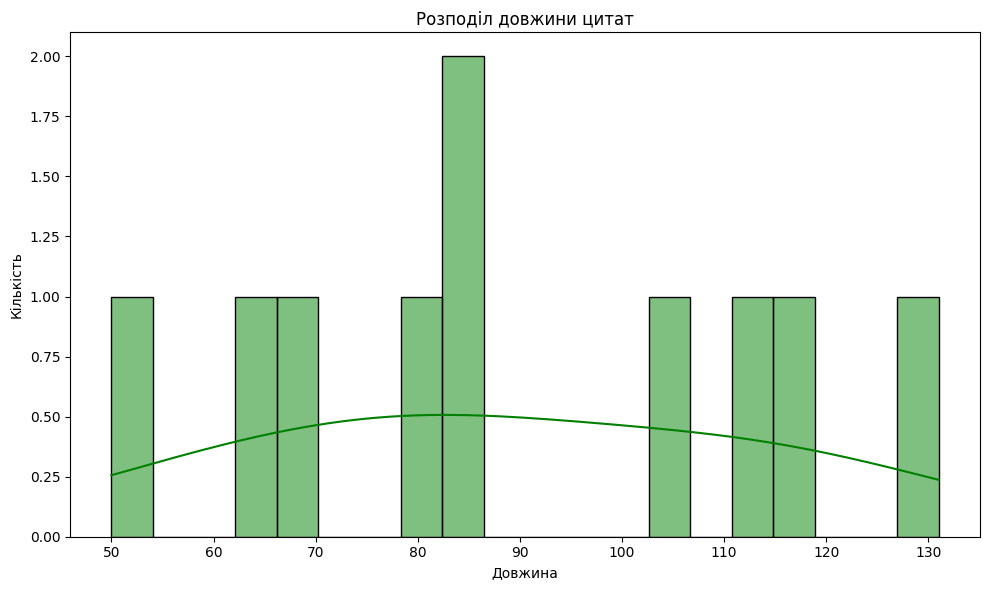

C:\Users\andri\AppData\Local\Temp\ipykernel_41292\3963146579.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_authors.index, x=top_5_authors.values, palette=palette)


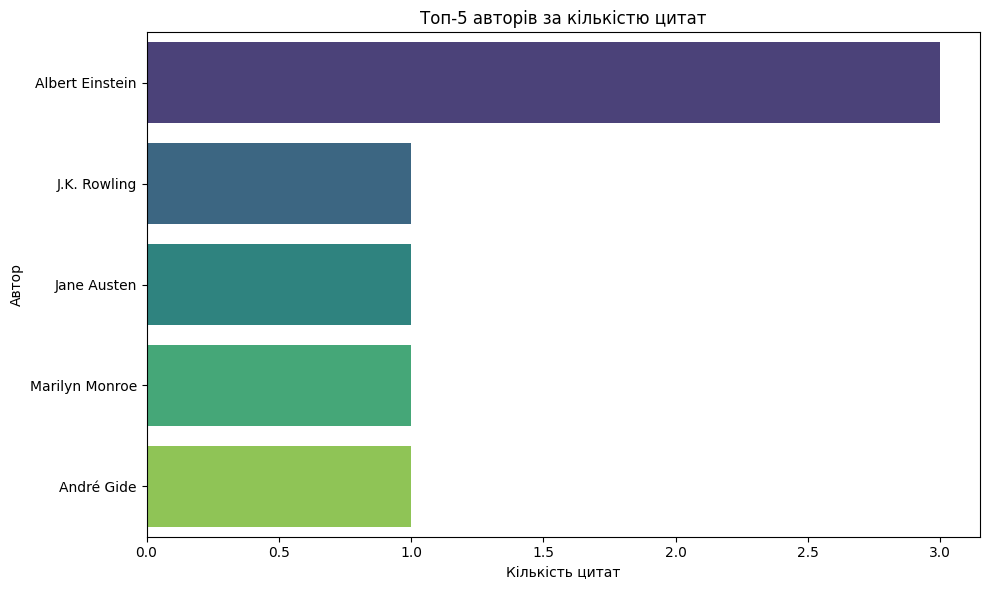

C:\Users\andri\AppData\Local\Temp\ipykernel_41292\3963146579.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_length_by_author.index,


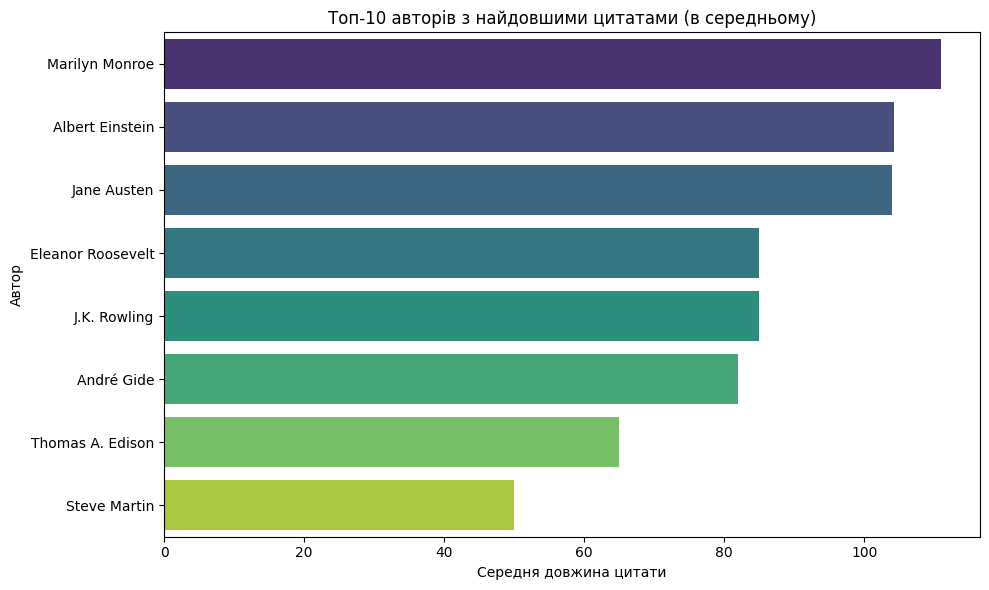

C:\Users\andri\AppData\Local\Temp\ipykernel_41292\3963146579.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="tag", x="count", data=tags_df, palette=palette)


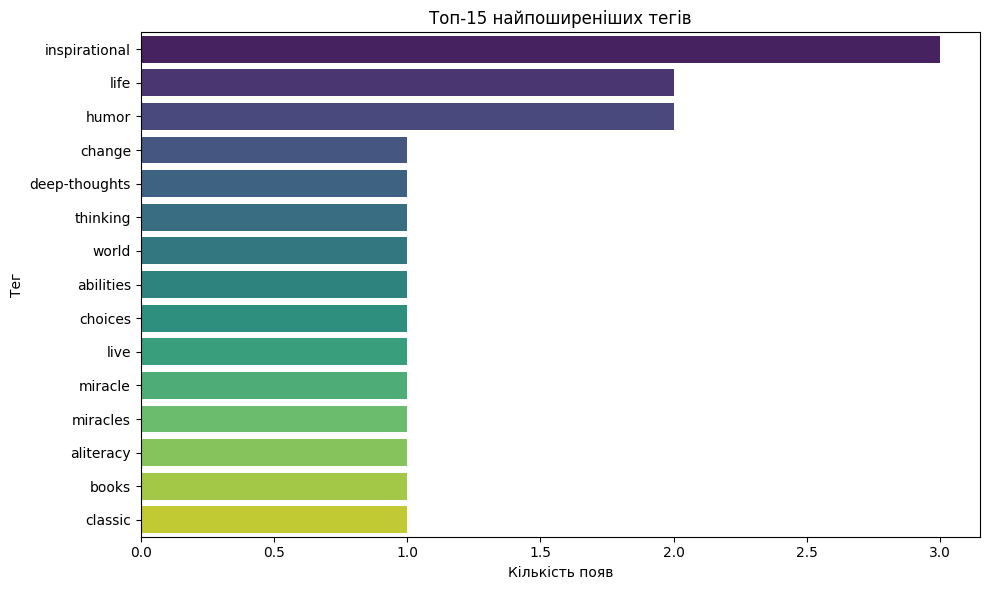

In [ ]:
from collections import Counter
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://quotes.toscrape.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


quotes_data = []
for quote in soup.select(".quote"):
    text = quote.find("span", class_="text").get_text()
    author = quote.find("small", class_="author").get_text()
    tags = [tag.get_text() for tag in quote.select(".tags .tag")]
    quotes_data.append({
        "text": text,
        "author": author,
        "tags": ", ".join(tags)
    })

df_raw = pd.DataFrame(quotes_data)
df_raw.to_csv("quotes_raw.csv", index=False)

df = pd.read_csv("quotes_raw.csv")

df.drop_duplicates(inplace=True)

df["text"] = df["text"].str.lower()
df["author"] = df["author"].str.title()

df["text_length"] = df["text"].apply(len)

df.to_csv("quotes_cleaned.csv", index=False)


engine = create_engine("sqlite:///quotes.db")
df.to_sql("quotes", con=engine, if_exists="replace", index=False)


palette = "viridis"
figsize = (10, 6)

plt.figure(figsize=figsize)
sns.histplot(df["text_length"], bins=20, kde=True, color="green")
plt.title("Розподіл довжини цитат")
plt.xlabel("Довжина")
plt.ylabel("Кількість")
plt.tight_layout()
plt.show()

top_5_authors = df["author"].value_counts().head(5)
plt.figure(figsize=figsize)
sns.barplot(y=top_5_authors.index, x=top_5_authors.values, palette=palette)
plt.title("Топ-5 авторів за кількістю цитат")
plt.xlabel("Кількість цитат")
plt.ylabel("Автор")
plt.tight_layout()
plt.show()


avg_length_by_author = df.groupby(
    "author")["text_length"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=figsize)
sns.barplot(y=avg_length_by_author.index,
            x=avg_length_by_author.values, palette=palette)
plt.title("Топ-10 авторів з найдовшими цитатами (в середньому)")
plt.xlabel("Середня довжина цитати")
plt.ylabel("Автор")
plt.tight_layout()
plt.show()

all_tags = []
for tags in df["tags"]:
    all_tags.extend(tags.split(", "))

top_tags = Counter(all_tags).most_common(15)
tags_df = pd.DataFrame(top_tags, columns=["tag", "count"])

plt.figure(figsize=figsize)
sns.barplot(y="tag", x="count", data=tags_df, palette=palette)
plt.title("Топ-15 найпоширеніших тегів")
plt.xlabel("Кількість появ")
plt.ylabel("Тег")
plt.tight_layout()
plt.show()